In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import string
from matplotlib_venn import venn3

/home/arnee/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df_humap=pd.read_csv("../data/humap_ensembl_id.csv")
df_humap["Name"]=df_humap.Ensembl_id1+"-"+df_humap.Ensembl_id2
df_humap["Name1"]=df_humap.Id1+"-"+df_humap.Id2

df_humap

Id1     Id2     Score      Ensembl_id1      Ensembl_id2  \
0      P46926  Q8TDQ7  1.000000  ENSG00000113552  ENSG00000163281   
1      P46926  Q9Y303  0.999751  ENSG00000113552  ENSG00000162066   
2      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000276327   
3      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000278120   
4      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000284150   
...       ...     ...       ...              ...              ...   
13744  Q16799  Q92630  0.511102  ENSG00000139970  ENSG00000127334   
13745  Q9UMX0  O14745  0.511091  ENSG00000135018  ENSG00000109062   
13746  Q7Z3B3  Q9BVI0  0.509570  ENSG00000120071  ENSG00000025293   
13747  Q53TN4  Q9Y232  0.509415  ENSG00000071967  ENSG00000153046   
13748  Q9NWL6  P18433  0.508974  ENSG00000138381  ENSG00000132670   

                                  Name          Name1  
0      ENSG00000113552-ENSG00000163281  P46926-Q8TDQ7  
1      ENSG00000113552-ENSG00000162066  P46926-Q9Y303  
2      ENSG00000277885-ENSG00000276327  P43631-Q14954  
3      ENSG00000277885-ENSG00000278120  P43631-Q14954  
4      ENSG00000277885-ENSG00000284150  P43631-Q14954  
...                                ...            ...  
13744  ENSG00000139970-ENSG00000127334  Q16799-Q92630  
13745  ENSG00000135018-ENSG00000109062  Q9UMX0-O14745  
13746  ENSG00000120071-ENSG00000025293  Q7Z3B3-Q9BVI0  
13747  ENSG00000071967-ENSG00000153046  Q53TN4-Q9Y232  
13748  ENSG00000138381-ENSG00000132670  Q9NWL6-P18433  

[13749 rows x 7 columns]

In [3]:
a=df_humap[["Id1","Ensembl_id1"]]
b=df_humap[["Id2","Ensembl_id2"]]
a=a.rename(columns={"Id1":"UniProt","Ensembl_id1":"Ensembl"})
b=b.rename(columns={"Id2":"UniProt","Ensembl_id2":"Ensembl"})

df_ensmap=pd.concat([a,b]).drop_duplicates()
df_ensmap

UniProt          Ensembl
0      P46926  ENSG00000113552
2      P43631  ENSG00000277885
6      P43631  ENSG00000275452
10     P43631  ENSG00000278300
35     H3BUK9  ENSG00000230031
...       ...              ...
13743  A6NDG6  ENSG00000184207
13744  Q92630  ENSG00000127334
13745  O14745  ENSG00000109062
13746  Q9BVI0  ENSG00000025293
13748  P18433  ENSG00000132670

[5584 rows x 2 columns]

In [4]:
def random_string(length=6):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))


In [5]:
df_HuRI=pd.read_csv("../data/HuRI.csv")
df_HuRI[['id1', 'id2']] = df_HuRI['Name'].str.split('-', expand=True)
df_temp=pd.merge(df_HuRI,df_ensmap,left_on=["id1"],right_on=["Ensembl"],how="outer")
df_new=pd.merge(df_temp,df_ensmap,left_on=["id2"],right_on=["Ensembl"],how="outer")
df_HuRI=df_new # .dropna()
df_HuRI['UniProt_x'] = df_HuRI['UniProt_x'].apply(lambda x: random_string() if pd.isna(x) or x == '' else x)
df_HuRI['UniProt_y'] = df_HuRI['UniProt_y'].apply(lambda x: random_string() if pd.isna(x) or x == '' else x)
df_HuRI["Name1"]=df_HuRI["UniProt_x"]+"-"+df_HuRI["UniProt_y"]
df_HuRI["Name2"]=df_HuRI["UniProt_y"]+"-"+df_HuRI["UniProt_x"]
df_HuRI

Name  pDockQ  NumRes  IF_plDDT  plDDT1  plDDT2  NumDiso1+90  \
0      NaN     NaN     NaN       NaN     NaN     NaN          NaN   
1      NaN     NaN     NaN       NaN     NaN     NaN          NaN   
2      NaN     NaN     NaN       NaN     NaN     NaN          NaN   
3      NaN     NaN     NaN       NaN     NaN     NaN          NaN   
4      NaN     NaN     NaN       NaN     NaN     NaN          NaN   
...    ...     ...     ...       ...     ...     ...          ...   
68232  NaN     NaN     NaN       NaN     NaN     NaN          NaN   
68233  NaN     NaN     NaN       NaN     NaN     NaN          NaN   
68234  NaN     NaN     NaN       NaN     NaN     NaN          NaN   
68235  NaN     NaN     NaN       NaN     NaN     NaN          NaN   
68236  NaN     NaN     NaN       NaN     NaN     NaN          NaN   

       NumDiso1-70-90  NumDiso1-50-70  NumDiso1-50  ...  len1  len2  id1  id2  \
0                 NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
1                 NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
2                 NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
3                 NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
4                 NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
...               ...             ...          ...  ...   ...   ...  ...  ...   
68232             NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
68233             NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
68234             NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
68235             NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   
68236             NaN             NaN          NaN  ...   NaN   NaN  NaN  NaN   

       UniProt_x        Ensembl_x  UniProt_y        Ensembl_y          Name1  \
0         5M2R1m              NaN     P09769  ENSG00000000938  5M2R1m-P09769   
1         UvjdTF              NaN     P08603  ENSG00000000971  UvjdTF-P08603   
2         jrSGmF              NaN     P48506  ENSG00000001084  jrSGmF-P48506   
3         fTo30W              NaN     P23511  ENSG00000001167  fTo30W-P23511   
4         Hgjb47              NaN     Q9Y4W2  ENSG00000001497  Hgjb47-Q9Y4W2   
...          ...              ...        ...              ...            ...   
68232     Q96S82  ENSG00000288408     2SvWug              NaN  Q96S82-2SvWug   
68233     Q66K64  ENSG00000288453     FVR88l              NaN  Q66K64-FVR88l   
68234     Q7L576  ENSG00000288461     nGpbkW              NaN  Q7L576-nGpbkW   
68235     Q8TE02  ENSG00000288485     rqEUp5              NaN  Q8TE02-rqEUp5   
68236     P17612  ENSG00000288516     PLrPEf              NaN  P17612-PLrPEf   

               Name2  
0      P09769-5M2R1m  
1      P08603-UvjdTF  
2      P48506-jrSGmF  
3      P23511-fTo30W  
4      Q9Y4W2-Hgjb47  
...              ...  
68232  2SvWug-Q96S82  
68233  FVR88l-Q66K64  
68234  nGpbkW-Q7L576  
68235  rqEUp5-Q8TE02  
68236  PLrPEf-P17612  

[68237 rows x 25 columns]

In [6]:
df=pd.read_csv("../data/evaluation.csv")
df["Struct"]= np.where(df.DockQ.notna(), True, False)
df_struct=df[df.DockQ.notna()]
df_struct

Unnamed: 0           Name  DockQ       MM    MMall  MMreorder  \
0              0  O00148-Q13838  0.016  0.44042  0.44358    0.44358   
1              1  O00231-O00232  0.003  0.56758  0.74089    0.56758   
2              2  O00231-O00487  0.510  0.64363  0.76284    0.64120   
3              3  O00231-Q15008  0.006  0.94567  0.94567    0.94567   
4              4  O00232-O00231  0.123  0.56706  0.73652    0.56751   
...          ...            ...    ...      ...      ...        ...   
1253        1258  Q9Y676-P82650  0.011  0.83740  0.83740    0.83707   
1254        1259  Q9Y676-P82930  0.004  0.42279  0.42281    0.42281   
1255        1260  Q9Y6G3-Q9NYK5  0.005  0.76297  0.71562    0.76297   
1256        1261  Q9Y6G5-Q9H0A8  0.021  0.42207  0.38937    0.42207   
1257        1262  Q9Y6G5-Q9NX08  0.311  0.69918  0.76228    0.69923   

      DockQreorder  DockQall  \
0            0.010     0.032   
1            0.124     0.124   
2            0.026     0.510   
3            0.562     0.562   
4            0.003     0.123   
...            ...       ...   
1253         0.395     0.395   
1254         0.146     0.146   
1255         0.210     0.210   
1256         0.021     0.021   
1257         0.064     0.311   

                                                   File   PDB  ...      plDDT  \
0     MODEL_MODEL/mmf962034_O00148_1xtk_A_Q13838_1xt...  1xtk  ...  80.304449   
1     EXPERIMENTAL/c906851_O00231_5VFQ_W_1_O00232_5V...  5VFQ  ...  73.414707   
2     EXPERIMENTAL/c906866_O00487_5L4K_Q_1_O00231_5L...  5L4K  ...  77.714977   
3     EXPERIMENTAL/c906893_Q15008_5VHS_Y_1_O00231_5V...  5VHS  ...  73.068397   
4     EXPERIMENTAL/c906851_O00231_5VFQ_W_1_O00232_5V...  5VFQ  ...  75.415585   
...                                                 ...   ...  ...        ...   
1253  EXPERIMENTAL/c995795_Q9Y676_6NU3_AR_1_P82650_6...  6NU3  ...  77.017227   
1254  EXPERIMENTAL/c1005563_Q9Y676_6NU2_A0_1_P82930_...  6NU2  ...  77.248444   
1255  EXPERIMENTAL/c1082138_Q9NYK5_6ZSE_7_1_Q9Y6G3_6...  6ZSE  ...  75.908788   
1256  MODEL_MODEL/mmf1285330_Q9H0A8_6bp6_A_Q9Y6G5_6b...  6bp6  ...  81.218980   
1257  MODEL_MODEL/mmf1111421_Q9Y6G5_6bp6_A_Q9NX08_6b...  6bp6  ...  86.099037   

       Dataset NumResOverlap  IF_plDDTOverlap  plDDTOverlap         SumIF  \
0     HuMap2.0           0.0              0.0     80.304449   4273.674660   
1     HuMap2.0           0.0              0.0     73.414707   8284.695641   
2     HuMap2.0           0.0              0.0     77.714977   6177.937304   
3     HuMap2.0           0.0              0.0     73.068397  15705.318501   
4     HuMap2.0           0.0              0.0     75.415585   8654.328343   
...        ...           ...              ...           ...           ...   
1253  HuMap2.0           0.0              0.0     77.017227  16893.363610   
1254  HuMap2.0           0.0              0.0     77.248444   6978.575008   
1255  HuMap2.0           0.0              0.0     75.908788   5441.022524   
1256  HuMap2.0           0.0              0.0     81.218980   5577.670998   
1257  HuMap2.0           0.0              0.0     86.099037  16054.450905   

         id1     id2    pDockQ Struct  
0     O00148  Q13838  0.036459   True  
1     O00231  O00232  0.191432   True  
2     O00231  O00487  0.252707   True  
3     O00231  Q15008  0.425040   True  
4     O00232  O00231  0.247750   True  
...      ...     ...       ...    ...  
1253  Q9Y676  P82650  0.629482   True  
1254  Q9Y676  P82930  0.277346   True  
1255  Q9Y6G3  Q9NYK5  0.192997   True  
1256  Q9Y6G5  Q9H0A8  0.211923   True  
1257  Q9Y6G5  Q9NX08  0.661825   True  

[1258 rows x 28 columns]

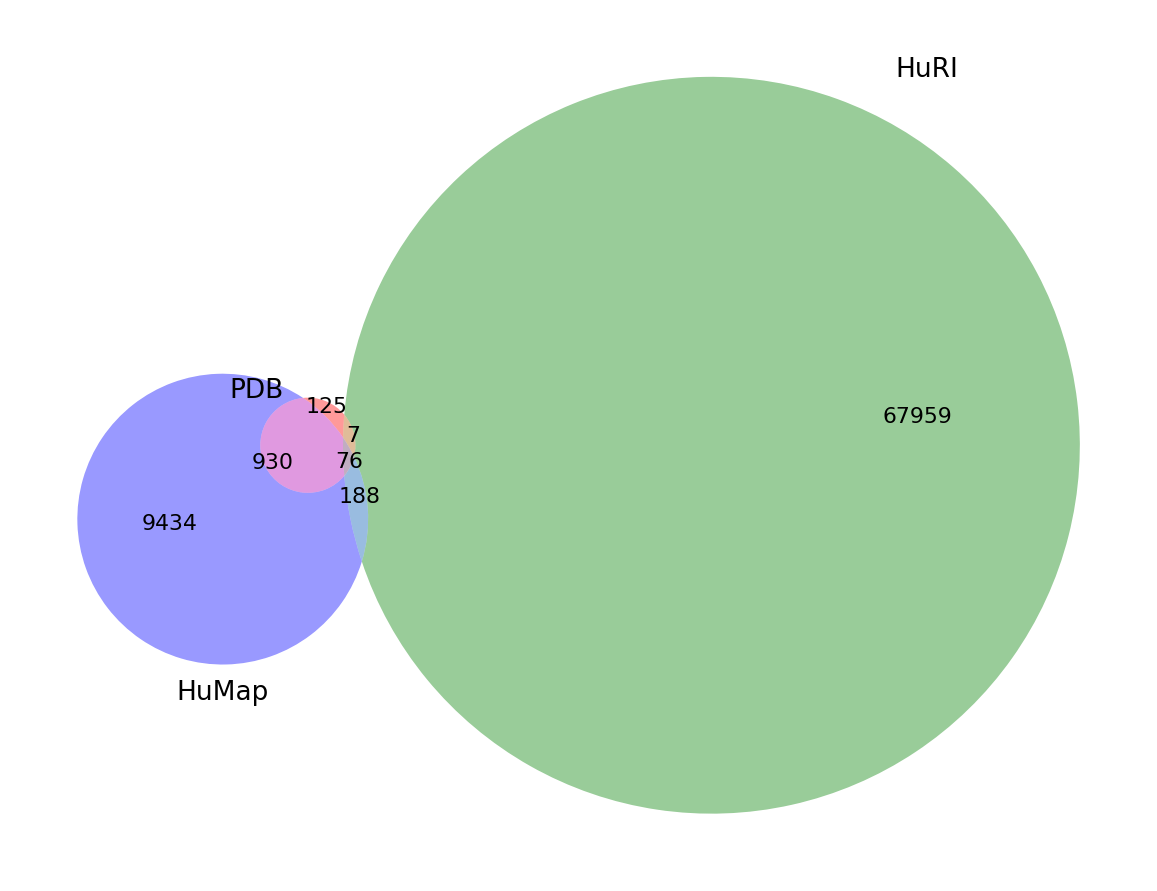

In [7]:
plt.figure(figsize=(20.48, 20.48))
set1=set(df_struct["Name"].to_list())
set2=set(df_HuRI["Name1"].to_list())
set3=set(df_humap["Name1"].to_list())
plt.rcParams.update({'font.size': 22})

fig=venn3([set1, set2, set3], ('PDB', 'HuRI', 'HuMap'))

plt.savefig("../plots/newvenn.png")
plt.savefig("../plots/newvenn.pdf")
plt.savefig("../plots/newvenn.tiff")